# First Look to the Data / Cleaning / EDA

## Importance of Sentiment Analysis

Sentiment analysis (also known as opinion mining or emotion AI) means text analysis with natural language processing. It is generally applied to [voice of the customer](https://en.wikipedia.org/wiki/Voice_of_the_customer) concepts such as reviews, surveys responses, social media. With sentiment analysis, positivity or negativity of text can be understood easily and quickly. As an example, politicians use this method to classify tweets about themselves for taking action. It is very important for companies also especially which sell their products online. In online stores, people do not have a chance to touch or see the products. Maybe the product is available in the market and you bought the same brand and same version of it online. But, when it is delivered you, it can be different than what you imagine still. So, customer experiences and voice of customer materials are getting more imporant for e-commerce. To increase customer satisfaction and to take strategic decisions, e-commerce companies must give more importance to reviews of customers. It is not easy to read every review and compare every product for taking action. Sentiment analysis makes it easier. With the sentiment analysis, reviews can be classified as positive and negative. It helps the company for quick and easy product analysis. 

More information about sentiment analysis can be found [here](https://en.wikipedia.org/wiki/Sentiment_analysis). There is an example from customer feedbacks below;


![title](images/example.png) 

*Image source : https://getthematic.com/insights/sentiment-analysis/*

## Sentiment Analysis of Kindle Store Reviews

In this project, I will work on sentiment analysis of Kindle Store reviews in Amazon. I choose this dataset because it is more easy to buy and read a book with Kindle. Going to the book store, finding a book which you like need more time than reaching every book from your tablet. Even people do not have to buy a Kindle to read online books from Kindle Store. When you download the Kindle App, you can reach all online books in Kindle Store from your laptop, phone or other devices.

## Aim of This Notebook

Aim of this notebook is data understanding, preparation and exploration. In this notebook, I will download data, merge another column from different dataset and try to understand the columns interactions with each others and target with the help of visualizations. I will also discover which columns need to clean. Then, I will prepare my data to modeling. 

At the end of the this notebook, all explorations, which are obtained from the first look of the data, can be found as a list.

## Data Source

The data is obtained from github.io page of [UC San Diego Computer Science and Engineering Department academic staff](https://nijianmo.github.io/amazon/index.html#subsets). Dataset contains product reviews and metadata, including 142.8 million reviews from May 1996 to July 2014. To download easily, some academic staff in computer science department at UCSD divided the data according to product categories. Kindle Store data is consisted of 5,722,988 reviews for 493,859 products. I prefer to use 5-core sample dataset(such that each of the remaining users and items have at least 5 reviews) and metadata for Kindle Store. The reasons to choose 5-core data is that continuous users contains more information than single reviewers. To reach and download metadata, people have to fill the form and submit it. 

The code of the getting data can be found [Getting_Data_from_json_Files notebook](https://github.com/ezgigm/product_recommendation_from_reviews/blob/master/Getting_Data_from_json_Files%20.ipynb).

My main data contains 2,222,983 rows and 12 columns. Also, I used the metadata to find the corresponding names of the books from product ID. 

# Importing Necessary Libraries

In [177]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

In [178]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

# Importing Data from .csv

In [179]:
df = pd.read_csv('kindle_data.csv', low_memory=False) #getting main data

In [180]:
df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names

In [181]:
df.head() #first look to df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [182]:
# merging the metadata title column to main dataset
df = pd.merge(df,df_meta[['title','asin']],on=['asin'], how='left') 

In [184]:
df.shape #to see the number of columns and rows

(2222983, 13)

In [185]:
df.isna().sum() #to see null values

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52617
reviewerName          142
reviewText            410
summary              1757
unixReviewTime          0
vote              1931032
image             2221618
title               20669
dtype: int64

Most important columns for my project are overall and reviewText. So I have to drop the nulls for these two columns.

In [186]:
df.dropna(subset=['reviewText'], inplace=True) #droping null's in reviews

In [187]:
df.isna().sum() # to check

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               52600
reviewerName          142
reviewText              0
summary              1735
unixReviewTime          0
vote              1930627
image             2221213
title               20658
dtype: int64

# Deeper Look to Columns

To decide cleaning and preparing process, I will look deeper to columns.

In [188]:
df.info(verbose=True, null_counts=True) #to see the type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222573 entries, 0 to 2222982
Data columns (total 13 columns):
overall           2222573 non-null float64
verified          2222573 non-null bool
reviewTime        2222573 non-null object
reviewerID        2222573 non-null object
asin              2222573 non-null object
style             2169973 non-null object
reviewerName      2222431 non-null object
reviewText        2222573 non-null object
summary           2220838 non-null object
unixReviewTime    2222573 non-null int64
vote              291946 non-null object
image             1360 non-null object
title             2201915 non-null object
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 222.6+ MB


In [10]:
df['overall'].value_counts() 

5.0    1353344
4.0     556256
3.0     197919
2.0      66888
1.0      48166
Name: overall, dtype: int64

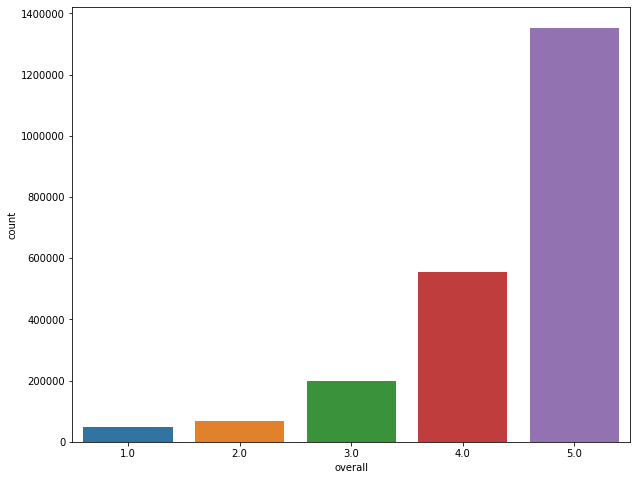

In [205]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='overall', data=df)

Mostly ratings in dataset consist of good reviews such as 4 and 5. It is seen that our target is imbalanced.

In [11]:
df['verified'].value_counts()

True     1417690
False     804883
Name: verified, dtype: int64

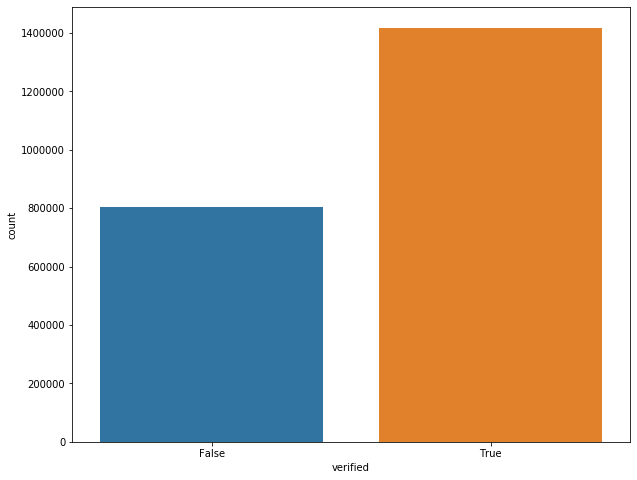

In [207]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', data=df)

Nearly, 64% of reviews are verified by Amazon in our data.

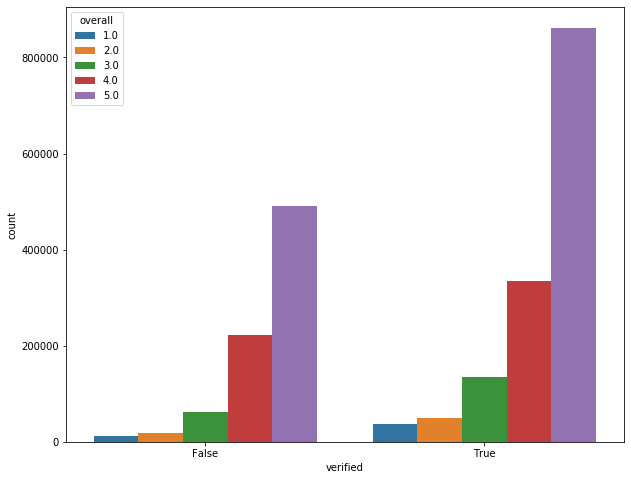

In [206]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue="overall", data=df)

The distribution of ratings are nearly same in verified and non-verified reviews.

In [194]:
df['reviewTime'].nunique()

4838

Review time is daily-based in our data. So, it means that data is collected from 4828 different days.

### Converting Data from String to Datetime to Divide Day, Month and Years

In [198]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"]) # convert to datetime

In [199]:
# to convert reviewTime column to day, month and year
df['day'] =df['reviewTime'].dt.day
df['month'] =df['reviewTime'].dt.month 
df['year'] =df['reviewTime'].dt.year

### Looking to Years

In [19]:
df['year'].value_counts()

2015    615680
2016    524890
2014    486926
2013    247913
2017    185370
2018     75655
2012     63467
2011     16685
2010      2583
2009       914
2008       857
2007       410
2005       283
2006       281
2004       178
2003       160
2002       113
2001        97
2000        94
1999        14
1998         2
1997         1
Name: year, dtype: int64

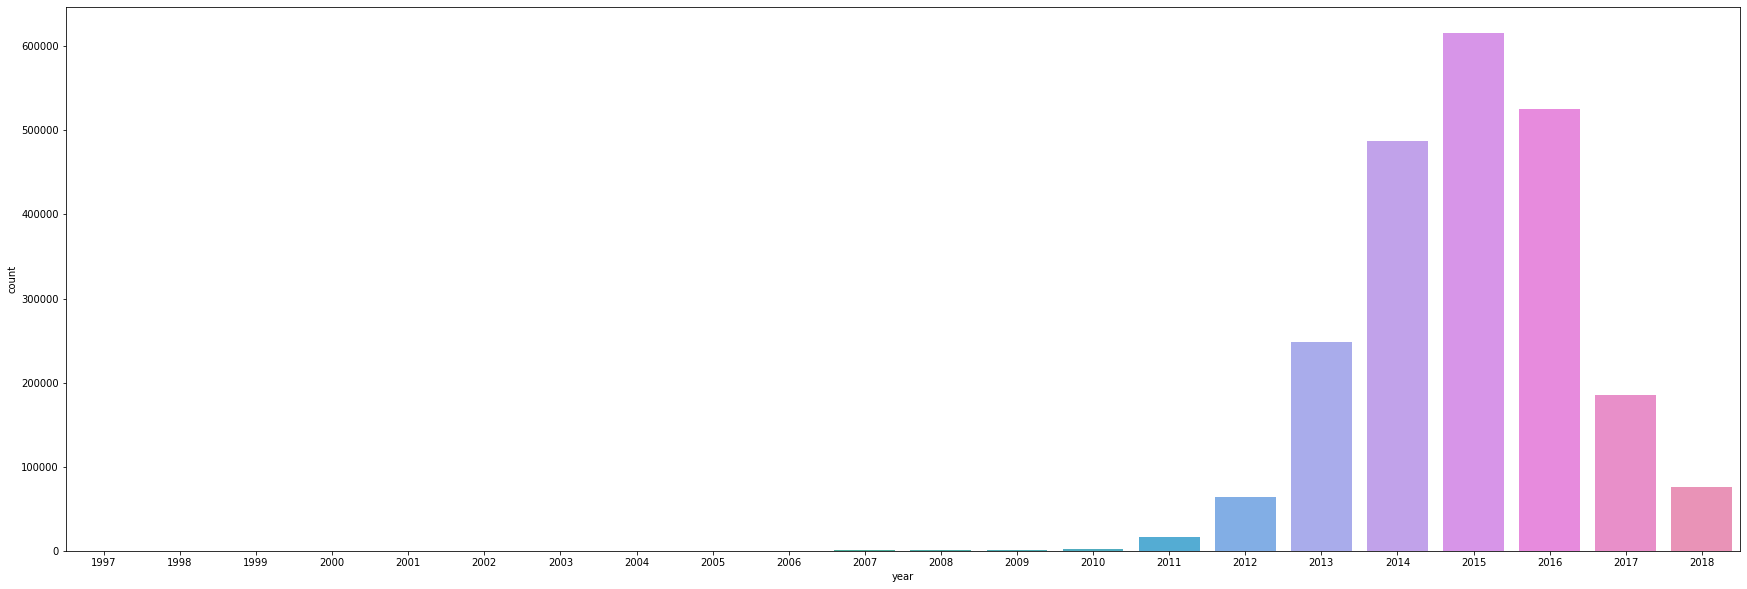

In [208]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', data=df)

Our data is consists of 21 years. From the graph, it is obviously seen that mostly data is obtained from recent years. It helps us to build more accurate model for future.

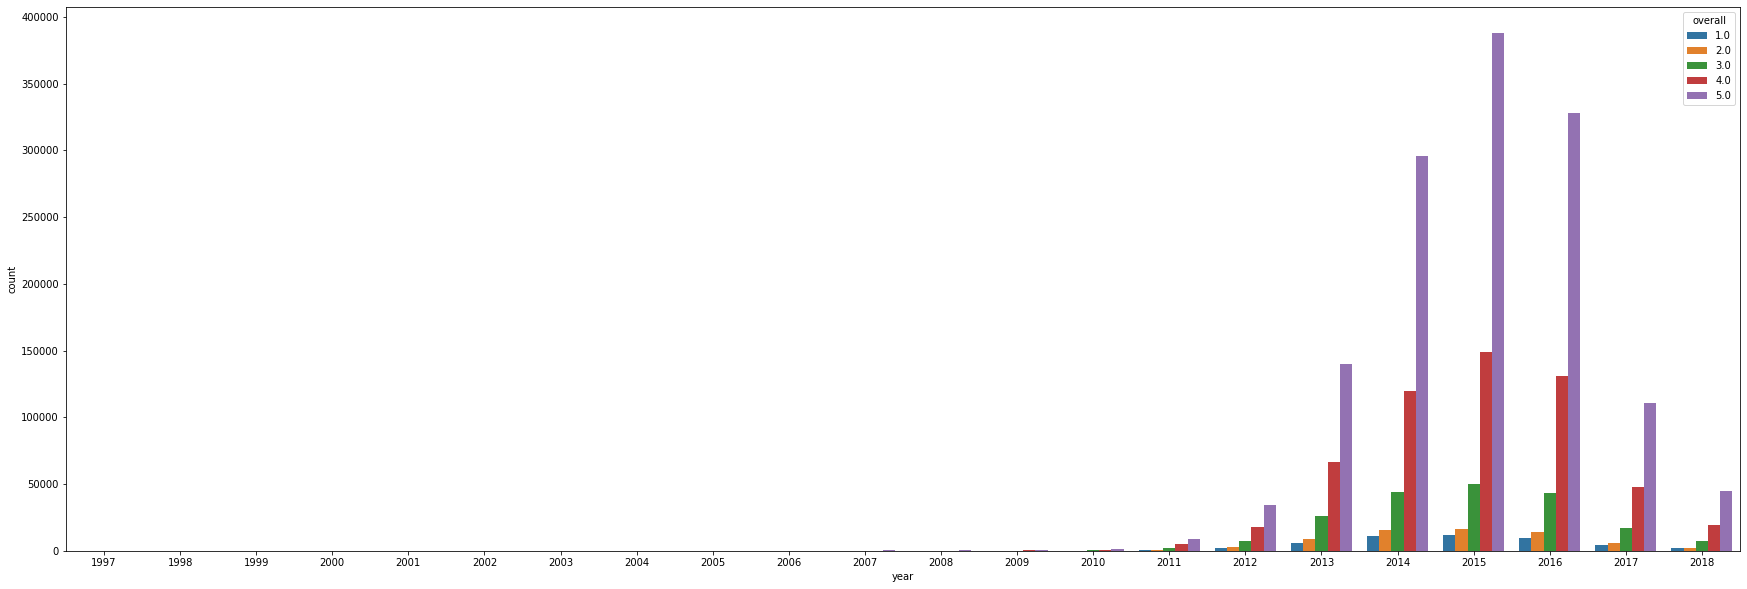

In [209]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', hue='overall', data=df)

Some years have higher good ratings.

### Looking to Months

In [21]:
df['month'].value_counts()

3     205772
1     200076
5     197691
4     193928
6     192535
7     183858
8     180840
2     180755
12    174977
11    171548
10    171075
9     169518
Name: month, dtype: int64

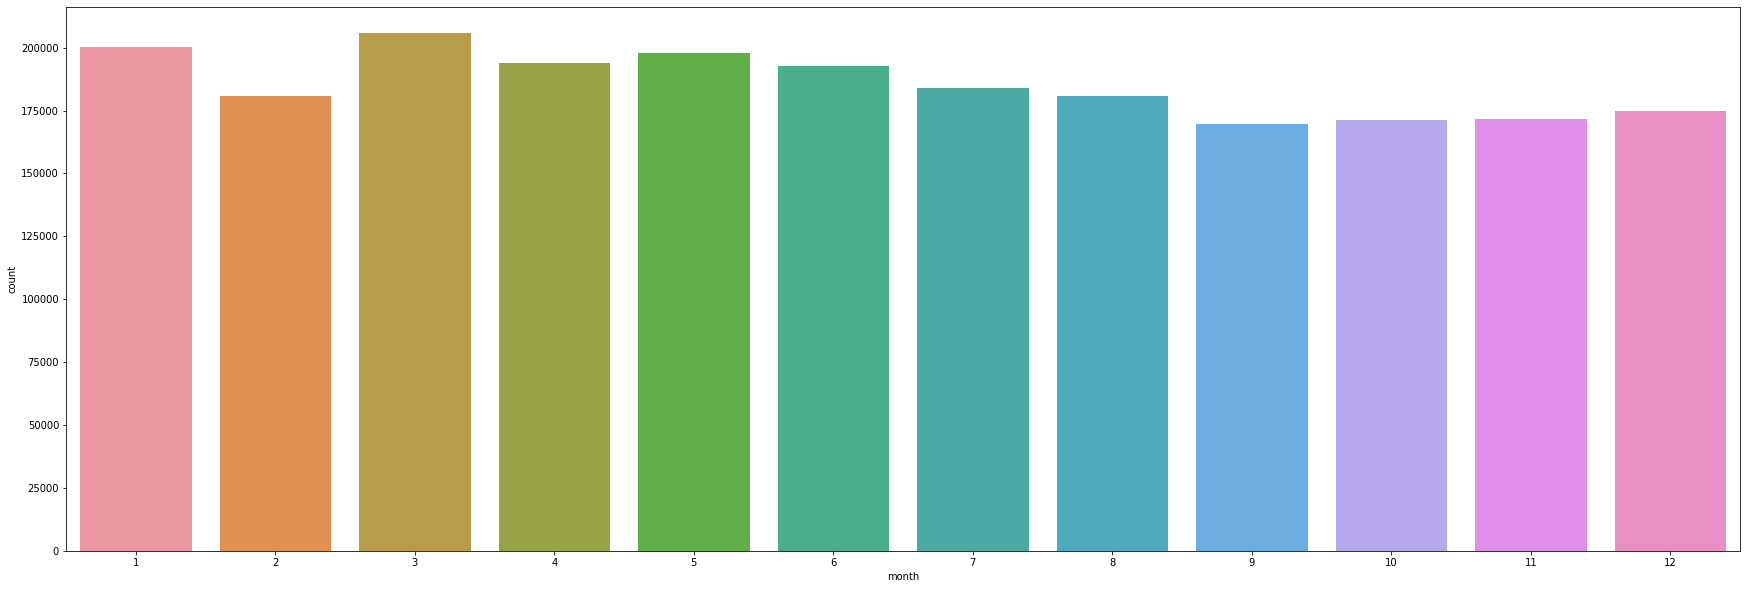

In [210]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month',data=df)

Mainly, we have similar rating number for each month in our data.

In [33]:
df.groupby('month')['overall'].mean()

month
1     4.394415
2     4.397682
3     4.405575
4     4.397560
5     4.400195
6     4.396328
7     4.382431
8     4.378887
9     4.385304
10    4.398439
11    4.406213
12    4.390817
Name: overall, dtype: float64

Each month has similar rating average.

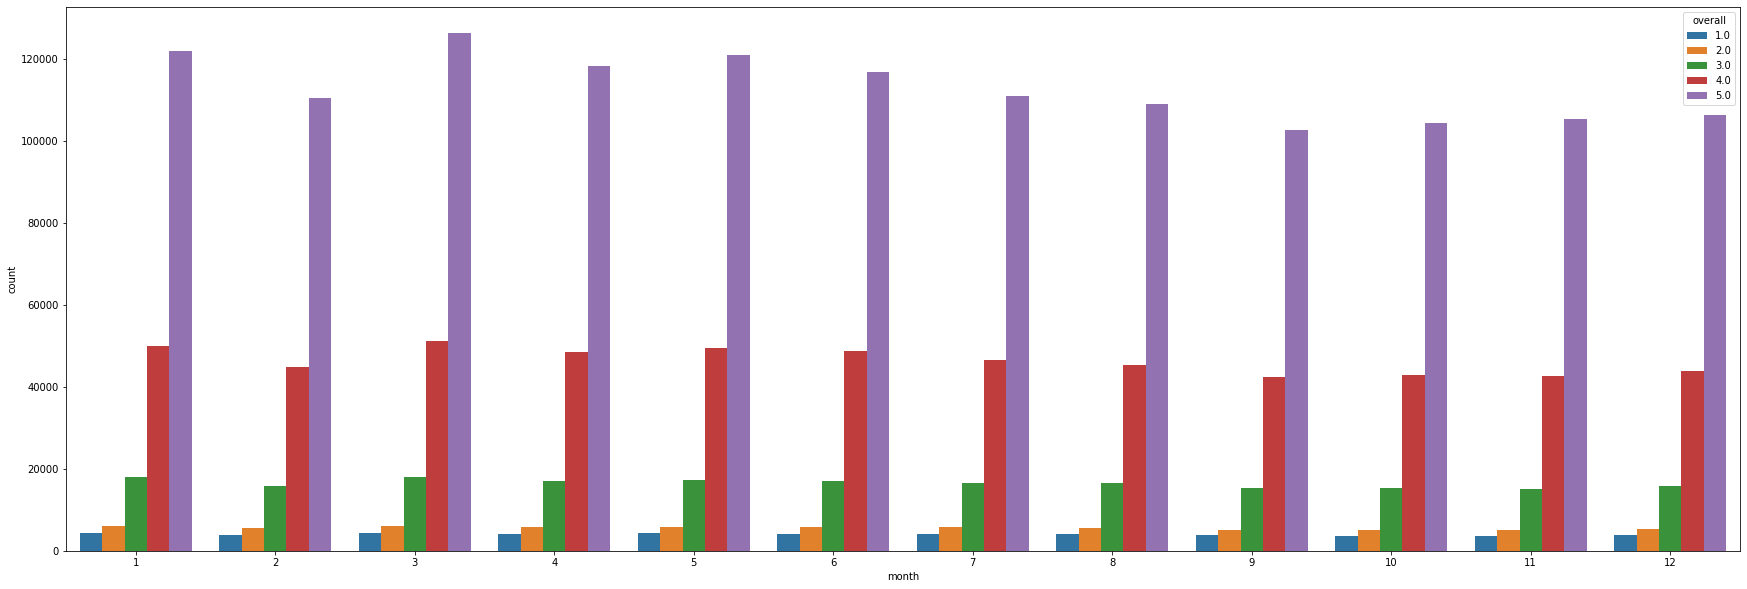

In [26]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', hue="overall", data=df)

Each month has similar rating distribution.

# Looking to Days

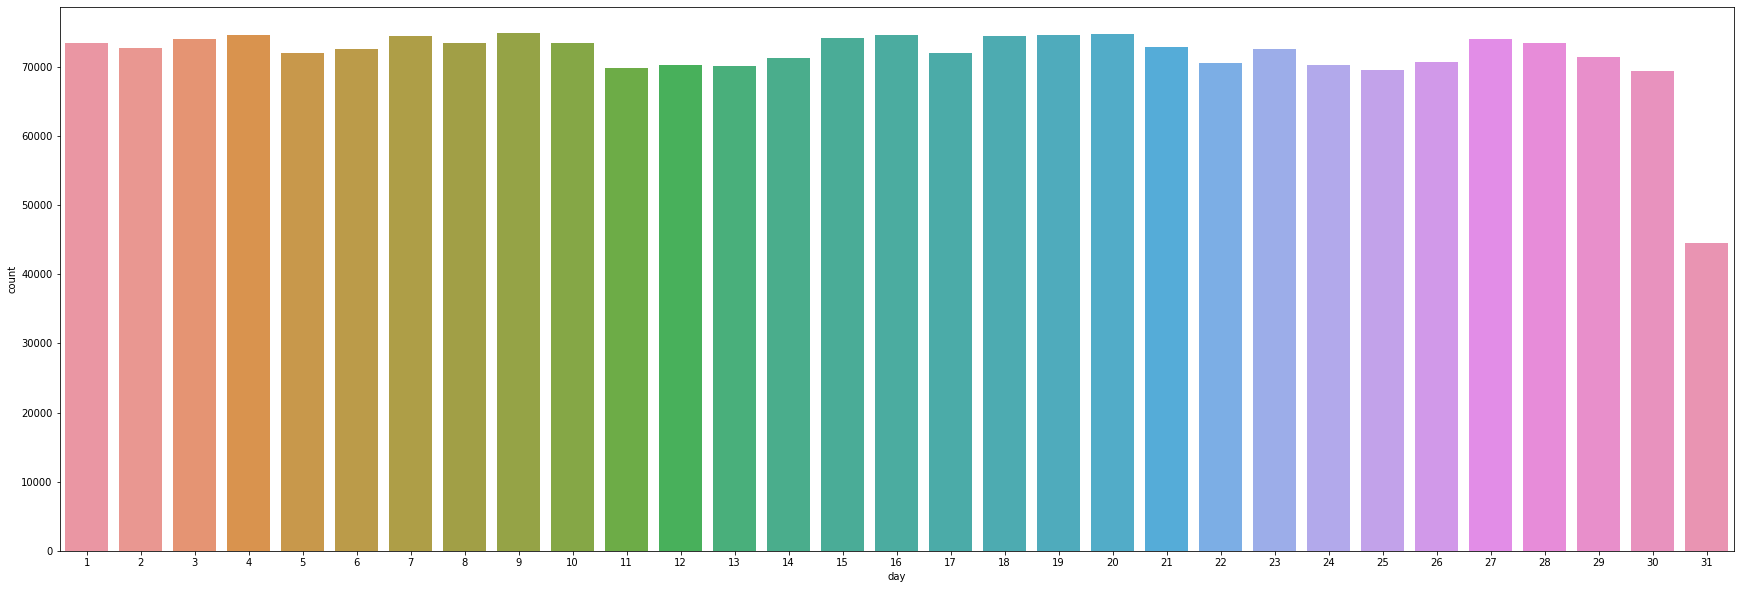

In [212]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day',data=df)

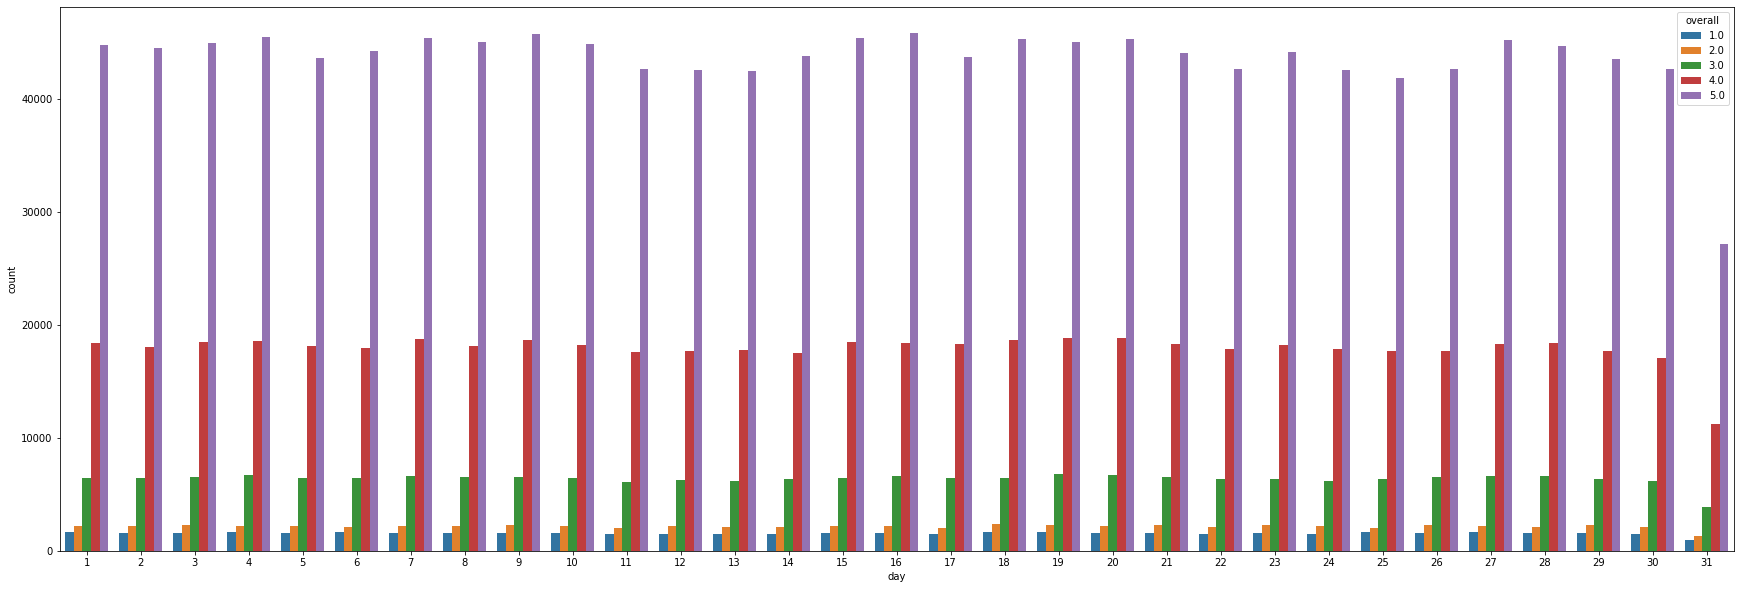

In [28]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', hue="overall", data=df)

According to plots above, our data distribution is nearly same for each day, except 31st. Because, every month do not have 31th day. This is also a good indicator for reliability for our data.

### Looking to Reviewers

In [213]:
df['reviewerID'].nunique()

139815

There are 139815 different ID for reviews in this data.

In [35]:
df['reviewerName'].nunique()

102635

Normally, reviewer ID must be same reviewer name but name is less than ID. It means that some people use same names with each other. So, reviewer ID column contains more information than name column. So, I will drop this column. 

In [215]:
df.drop(columns=['reviewerName'],inplace=True) #droping reviewername column

### Looking to Reviewers According to Ratings and Rated Books

In [66]:
df.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100)

reviewerID
A3ES0P8SR1RZ4N    5.0
A35X41LLPO5ABN    5.0
A35X23NWD55TPK    5.0
A35X22F6XM7TQ9    5.0
A35X0P9G1SRYD     5.0
                 ... 
A35U8NE1FV9FKH    5.0
A35TXH5HL73IOM    5.0
A35TVBOBQ1TSP7    5.0
A35TUXRBAV2P1S    5.0
A35TSS9WZ10RIV    5.0
Name: overall, Length: 100, dtype: float64

Top 100 head rating averages are 5. But, it does not give good idea to us. Because maybe they just rated 5 books as 5. But, there are many user which rated more than 500 books.

In [70]:
df.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A1JLU5H1CCENWX    1377
A328S9RN3U5M68    1234
A13QTZ8CIMHHG4    1011
A3GWE80SUGORJD    1007
A2YJ8VP1SSHJ7      931
                  ... 
A3Q9ZYNO1MXQDW     432
A2S5EPJ451WL3I     431
A2UQGX6YMQ5BAL     427
AW7JJRAMYZY1X      425
A1QDU32SAI8LO2     425
Name: asin, Length: 100, dtype: int64

Each user, who is in the top 100 according to rate count, have more than 400 reviews. 'asin' shows the book ID's. So, we can count books according to 'asin' column.

### Looking to Top 3 User According to Review Number

In [82]:
df.loc[df['reviewerID']=='A1JLU5H1CCENWX'].groupby('overall')['asin'].count()

overall
3.0       7
4.0      75
5.0    1295
Name: asin, dtype: int64

In [79]:
df.loc[df['reviewerID']=='A328S9RN3U5M68'].groupby('overall')['asin'].count()

overall
3.0     13
4.0    248
5.0    973
Name: asin, dtype: int64

In [81]:
df.loc[df['reviewerID']=='A13QTZ8CIMHHG4'].groupby('overall')['asin'].count()

overall
2.0      9
3.0    282
4.0    490
5.0    230
Name: asin, dtype: int64

Although, top 2 user only have 3,4 and 5 rating, 3rd one has 2 also.

### Looking to Books

In [83]:
df['asin'].nunique() #showing number of books in data

98824

We will look at the books according to number of reviews. Because only rating does not give reliably results such as 5 average rating book with 5 reviews vs. 4.8 average rating book with 1000 reviews.

# 8 Reviews with 5.0 Average Rating vs 2217 Reviews with 4.3 Average Rating 

In [309]:
df.groupby('asin')['overall'].mean().sort_values(ascending=False).head(10)

asin
B0176NQRQE    5.0
B013BH2N0I    5.0
B00JM2H3CA    5.0
B00JLJ0FZ6    5.0
B00JL2OACM    5.0
B00JKT2Y10    5.0
B00JKT2RA8    5.0
B00JKPOKHK    5.0
B00JKO0HSM    5.0
B00JKO0F5W    5.0
Name: overall, dtype: float64

In [223]:
df['asin'].value_counts().head(10)

B00YN6XHMU    2217
B00C2WDD5I    1461
B00ESJ3S94    1327
B015BIHKH6    1249
B00IJYII4E     808
B00EV9LSJI     772
B00ABLJ5X6     762
B0142IHZPI     761
B00WGXCP1G     744
B004KKY782     720
Name: asin, dtype: int64

In [311]:
df.loc[df['asin']=='B0176NQRQE'].groupby('overall').count() # according to review avg.

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
5.0,8,8,8,8,8,8,8,8,1,0,8,8,8,8


Only 8 reviews but all is 5.0.

In [312]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('overall').count() # according to review number

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
overall,,,,,,,,,,,,,,
1.0,94,94,94,94,94,94,94,94,44,0,94,94,94,94
2.0,97,97,97,97,97,97,97,97,16,0,97,97,97,97
3.0,222,222,222,222,222,222,222,222,23,0,222,222,222,222
4.0,355,355,355,355,355,355,354,355,24,0,355,355,355,355
5.0,1449,1449,1449,1449,1448,1449,1448,1449,158,5,1449,1449,1449,1449


Total 2217 reviews but 8.7% rated as 1 and 2.

When we compare our two results, sorting books according to review numbers is shown more reliable than looking to the average of ratings. So, we will analyze and compare mostly reviewed books.  

## Top 10 Highly Reviewed Books

In [238]:
df.loc[df['asin']=='B00YN6XHMU'].groupby('title').mean() # run this for 10 different asin values

,overall,verified,unixReviewTime,day,month,year
title,,,,,,
Grey: Fifty Shades of Grey as told,4.338746,0.878214,1.443439e+09,17.377988,6.85115,2015.211096


I run the code for 10 different books and wrote values in dataframe.

In [303]:
df_books = pd.DataFrame(columns=["Book", "Rating #",'Rating Avg.']) # result df for showing books together

In [304]:
# writing findings to df
df_books = df_books.append({     
     "Book": 'Fifty Shades of Grey' ,
      "Rating #": 2217 , 
       'Rating Avg.' : 4.34}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Atlantis Gene:(Book 1)' ,
      "Rating #": 1461 , 
       'Rating Avg.' : 4.14}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Fueled (Book 2)' ,
      "Rating #": 1327 , 
       'Rating Avg.' : 4.83}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Sense And Sensibility' ,
      "Rating #": 1249 , 
       'Rating Avg.' : 4.35}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'The Girl in the Box, Books 1-3' ,
      "Rating #": 808 , 
       'Rating Avg.' : 4.40}, ignore_index=True)

In [305]:
df_books = df_books.append({     
     "Book": 'Tears of Tess (Book 1)' ,
      "Rating #": 772 , 
       'Rating Avg.' : 4.57}, ignore_index=True)
df_books = df_books.append({     
     "Book": 'Takedown Twenty' ,
      "Rating #": 762 , 
       'Rating Avg.' : 4.17}, ignore_index=True)
df_books = df_books.append({     
     "Book": "When I'm Gone" ,
      "Rating #": 761 , 
       'Rating Avg.' : 4.50}, ignore_index=True)
df_books = df_books.append({     
     "Book": "Dipping Into Sin" ,
      "Rating #": 744 , 
       'Rating Avg.' : 4.23}, ignore_index=True)
df_books = df_books.append({     
     "Book": "The Color of Heaven(Book 1)" ,
      "Rating #": 720 , 
       'Rating Avg.' : 4.50}, ignore_index=True)

In [306]:
df_books

,Book,Rating #,Rating Avg.
0,Fifty Shades of Grey,2217,4.34
1,The Atlantis Gene:(Book 1),1461,4.14
2,Fueled (Book 2),1327,4.83
3,Sense And Sensibility,1249,4.35
4,"The Girl in the Box, Books 1-3",808,4.40
5,Tears of Tess (Book 1),772,4.57
6,Takedown Twenty,762,4.17
7,When I'm Gone,761,4.50
8,Dipping Into Sin,744,4.23
9,The Color of Heaven(Book 1),720,4.50


[Text(0, 0, 'Fifty Shades of Grey'),
 Text(0, 0, 'The Atlantis Gene:(Book 1)'),
 Text(0, 0, 'Fueled (Book 2)'),
 Text(0, 0, 'Sense And Sensibility'),
 Text(0, 0, 'The Girl in the Box, Books 1-3'),
 Text(0, 0, 'Tears of Tess (Book 1)'),
 Text(0, 0, 'Takedown Twenty'),
 Text(0, 0, "When I'm Gone"),
 Text(0, 0, 'Dipping Into Sin'),
 Text(0, 0, 'The Color of Heaven(Book 1)')]

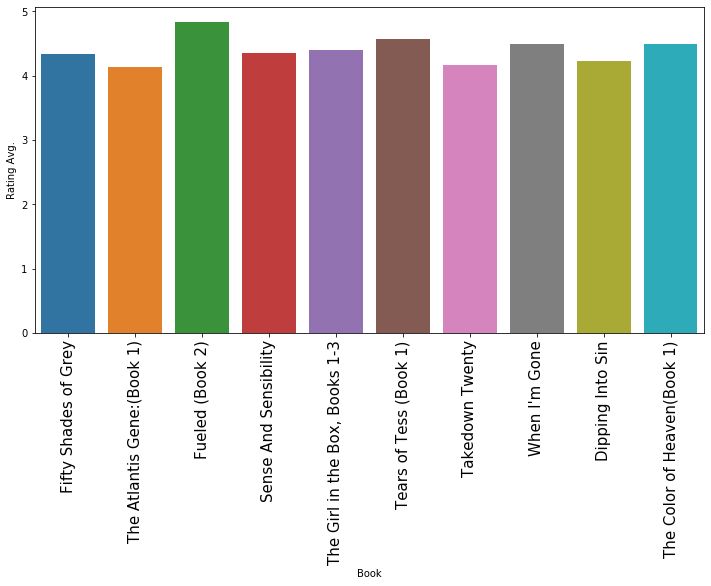

In [298]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating Avg.",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

[Text(0, 0, 'Fifty Shades of Grey'),
 Text(0, 0, 'The Atlantis Gene:(Book 1)'),
 Text(0, 0, 'Fueled (Book 2)'),
 Text(0, 0, 'Sense And Sensibility'),
 Text(0, 0, 'The Girl in the Box, Books 1-3'),
 Text(0, 0, 'Tears of Tess (Book 1)'),
 Text(0, 0, 'Takedown Twenty'),
 Text(0, 0, "When I'm Gone"),
 Text(0, 0, 'Dipping Into Sin'),
 Text(0, 0, 'The Color of Heaven(Book 1)')]

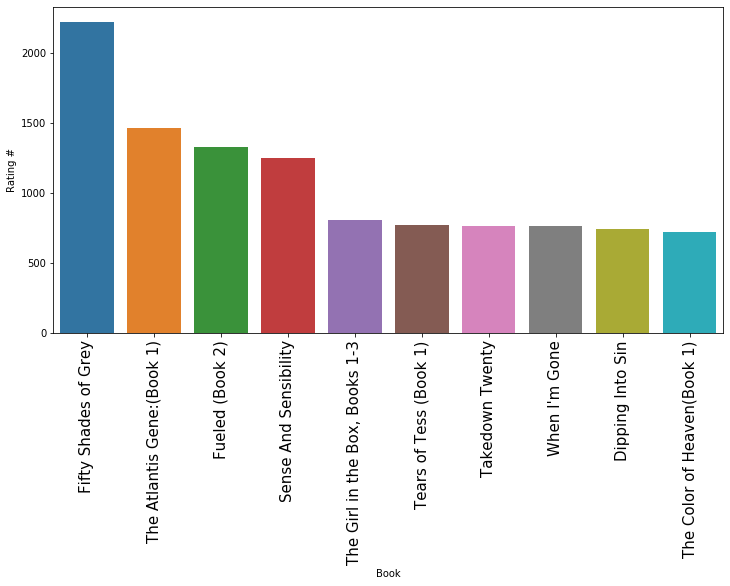

In [307]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Book', y="Rating #",data=df_books)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

# Looking at Books According to 'title' Column (based on # of reviews)

In [225]:
df['title'].value_counts().head(10)

Grey: Fifty Shades of Grey as told                                                       2217
Claimed                                                                                  2014
Death                                                                                    1468
The Atlantis Gene: A Thriller (The Origin Mystery, Book 1) - Kindle edition              1461
Fueled (The Driven Series Book 2) - Kindle edition                                       1327
Sense And Sensibility (Annotated                                                         1249
Taken                                                                                    1199
Bound                                                                                     843
The Girl in the Box Series, Books 1-3: Alone, Untouched and Soulless - Kindle edition     808
Tempted                                                                                   784
Name: title, dtype: int64

When I look at the top 10 highest review numbers books, I realized this list is different than book ID's list. When I looked at the details in Amazon.com, I realized that some books have series but as title they were written as same. Also, there are different books with same names. So, finding a title according to Book ID is more reliable way from just looking at titles.

### 'style' Column

In [315]:
df['style'].value_counts()

{'Format:': ' Kindle Edition'}                     2140965
{'Format:': ' Paperback'}                            15887
{'Format:': ' Hardcover'}                             7342
{'Format:': ' Audible Audiobook'}                     2940
{'Format:': ' Mass Market Paperback'}                 2353
{'Format:': ' Audio CD'}                               193
{'Format:': ' Kindle Edition with Audio/Video'}         79
{'Format:': ' MP3 CD'}                                  46
{'Format:': ' Print Magazine'}                          40
{'Format:': ' Board book'}                              31
{'Format:': ' Leather Bound'}                           29
{'Format:': ' Audio Cassette'}                          14
{'Format:': ' Perfect Paperback'}                       13
{'Format:': ' Flexibound'}                               8
{'Format:': ' School & Library Binding'}                 6
{'Format:': ' DVD'}                                      6
{'Format:': ' Library Binding'}                         

Normally, this data is taken from Amazon's Kindle Store pages so, most probably style is written different than Kindle Edition by mistake. But, to make sure(maybe advertised products mixed to the page) about working only with Kindle Store edition of books, I will drop ather styles from my data.

In [321]:
df.loc[df['style'] == "{'Format:': ' Kindle Edition'}"]

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,image,title,day,month,year
0,4.0,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,NaN,3,7,2014
1,5.0,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,NaN,26,5,2014
2,5.0,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN,NaN,16,9,2016
3,5.0,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},"As usual for him, a good book",a good,1456963200,NaN,NaN,NaN,3,3,2016
4,5.0,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},MB is one of the original western writers and ...,A Western,1441843200,2,NaN,NaN,10,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222978,3.0,False,2016-07-16,A3Q6HJYRJX87Z9,B01HJENY3Y,{'Format:': ' Kindle Edition'},Ok book but some parts just didn't add up I fe...,Cool book,1468627200,NaN,NaN,Poison Kisses 2: My Best Kept Secret - Kindle ...,16,7,2016
2222979,5.0,False,2016-07-12,A2O7HQNKCMOMUP,B01HJENY3Y,{'Format:': ' Kindle Edition'},Kia I loved this book. I am so glad that Sky ...,Crazy Read,1468281600,NaN,NaN,Poison Kisses 2: My Best Kept Secret - Kindle ...,12,7,2016
2222980,5.0,False,2016-07-01,A38NOWP7LQI8CM,B01HJENY3Y,{'Format:': ' Kindle Edition'},This picks up where part one left off. Secret ...,Loved it,1467331200,NaN,NaN,Poison Kisses 2: My Best Kept Secret - Kindle ...,1,7,2016
2222981,5.0,False,2016-07-01,A1H9WGEEKVK0FM,B01HJENY3Y,{'Format:': ' Kindle Edition'},What a beautiful ending to such a twisted begi...,Beautiful ending,1467331200,NaN,NaN,Poison Kisses 2: My Best Kept Secret - Kindle ...,1,7,2016


In [154]:
df_merged['summary'].nunique()

1260983

In [155]:
df_merged['summary'][0]

'pretty good story'

In [156]:
df_merged['reviewText'][0]

'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book'

In [157]:
df_merged['vote'].value_counts().head()

2    131605
3     56434
4     30207
5     18149
6     11770
Name: vote, dtype: int64

In [158]:
df_merged['image'].value_counts().head()

['https://images-na.ssl-images-amazon.com/images/I/31s3gdrv9GL._SY88.jpg']    14
['https://images-na.ssl-images-amazon.com/images/I/51-Fi5BvzbL._SY88.jpg']     9
['https://images-na.ssl-images-amazon.com/images/I/71eN5U4UQoL._SY88.jpg']     7
['https://images-na.ssl-images-amazon.com/images/I/61Rr6pfHbeL._SY88.jpg']     7
['https://images-na.ssl-images-amazon.com/images/I/41JoJPMkZhL._SY88.jpg']     6
Name: image, dtype: int64

# I am here

In [10]:
df = df.loc[:, ['reviewText', 'overall']]
df.head()

,reviewText,overall
0,"pretty good story, a little exaggerated, but I...",4.0
1,"If you've read other max brand westerns, you k...",5.0
2,"Love Max, always a fun twist",5.0
3,"As usual for him, a good book",5.0
4,MB is one of the original western writers and ...,5.0


In [111]:
df_trial = df.head(10000)

In [112]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [113]:
df_trial['overall'] = df_trial['overall'].apply(np.int64)

/Users/ezgi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       10000 non-null int64
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [115]:
df_trial.isna().sum()

reviewText    9
overall       0
dtype: int64

In [116]:
df_trial = df_trial.dropna()

In [118]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 2 columns):
reviewText    9991 non-null object
overall       9991 non-null int64
dtypes: int64(1), object(1)
memory usage: 234.2+ KB


In [119]:
def calc_sentiment(overall):
    if overall == 5:
        return 2
    elif overall == 4:
        return 2
    elif overall == 1 :
        return 0
    elif overall == 2 :
        return 0
    else:
        return 1

In [120]:
df_trial['sentiment'] = df_trial['overall'].apply(calc_sentiment)

In [121]:
df_trial['sentiment'].value_counts()

2    7993
1    1141
0     857
Name: sentiment, dtype: int64

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

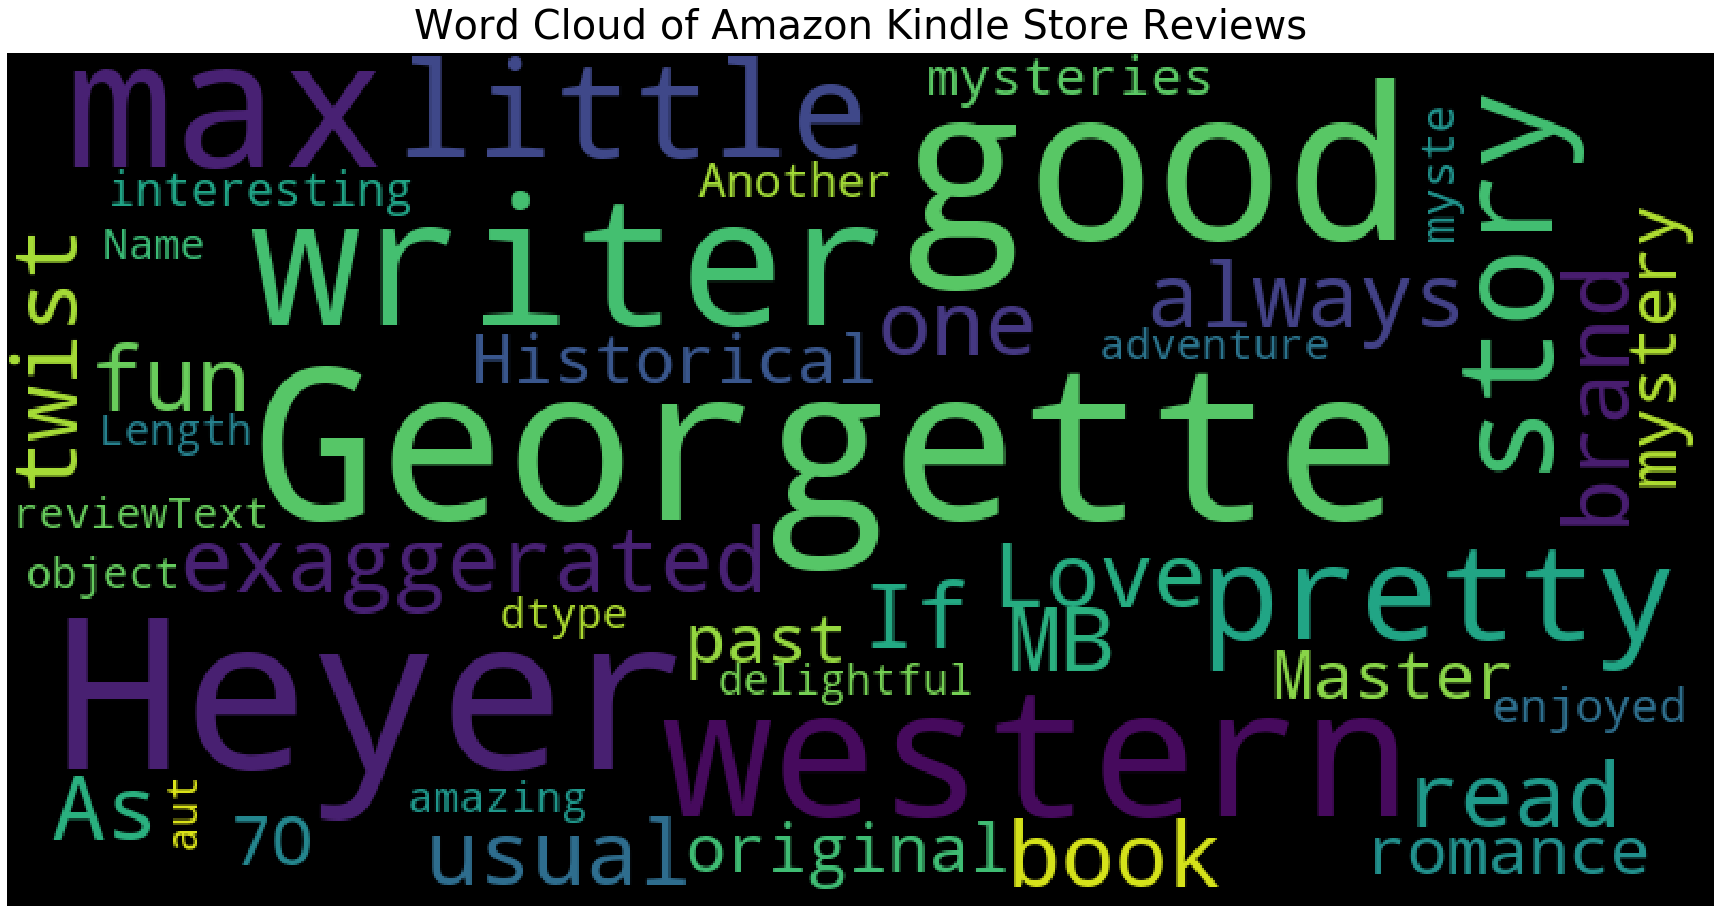

In [122]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_trial['reviewText'], title="Word Cloud of Amazon Kindle Store Reviews")



In [123]:
stopwords = set(STOPWORDS)

In [124]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [143]:
def model(df) :
    X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], 
                                                        df['sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    word_vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        strip_accents='unicode',
        analyzer='word',
        token_pattern=r'\w{1,}',
        stop_words='english',
        ngram_range=(1, 1),
        max_features=10000)

    word_vectorizer.fit(df['reviewText'])
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    plt.show()

(7992,)
(1999,)
Accuracy:
TRAIN: 0.8845095095095095
TEST: 0.7983991995997999

Balanced Accuracy:
TRAIN: 0.9203877867707013
TEST: 0.6872216188272565


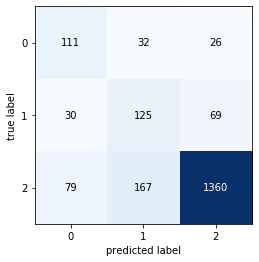

In [144]:
model(df_trial)

# LogReg with 10000 balanced target classes sampled

In [145]:
df['overall'] = df['overall'].apply(np.int64)

In [146]:
df['sentiment'] = df['overall'].apply(calc_sentiment)

In [147]:
df['sentiment'].value_counts()

2    1909965
1     197949
0     115069
Name: sentiment, dtype: int64

In [149]:
df_0 = df.loc[df['sentiment']==0].head(10000)

In [150]:
df_1 = df.loc[df['sentiment']==1].head(10000)

In [151]:
df_2 = df.loc[df['sentiment']==2].head(10000)

In [152]:
frames = [df_0, df_1, df_2]

df_trial_new = pd.concat(frames)

In [154]:
df_trial_new['sentiment'].value_counts()

2    10000
1    10000
0    10000
Name: sentiment, dtype: int64

In [166]:
df_trial_new = df_trial_new.dropna()

(23991,)
(5998,)
Accuracy:
TRAIN: 0.7844608394814723
TEST: 0.6958986328776259

Balanced Accuracy:
TRAIN: 0.7844072276092117
TEST: 0.6963028825222364


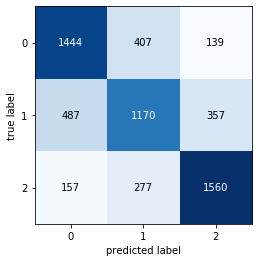

In [167]:
model(df_trial_new)

# Trial with 2-sentiments and torch from 

https://www.kaggle.com/lalwaniabhishek/abhishek-lalwani-bits-twitter-text

pre-trained model baseline 

In [162]:
def generate_bigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(2)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

In [159]:
def generate_trigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(3)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

In [163]:
#Testing the method
generate_bigrams(['This', 'film', 'is', 'terrible'])

['This', 'film', 'is', 'terrible', 'is terrible', 'film is', 'This film']

In [71]:
import torch
from torchtext import data
from torchtext import datasets

In [72]:
import random

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(preprocessing = generate_bigrams)
TARGET = data.LabelField(dtype = torch.float)

In [77]:
def calc_two_sentiment(overall):
    if overall >=3:
        return 1
    else:
        return 0

In [78]:
df_new = df.head(10000)

In [83]:
df_new.head()

,reviewText,overall
0,"pretty good story, a little exaggerated, but I...",4.0
1,"If you've read other max brand westerns, you k...",5.0
2,"Love Max, always a fun twist",5.0
3,"As usual for him, a good book",5.0
4,MB is one of the original western writers and ...,5.0


In [84]:
df_new['sentiments'] = df_new['overall'].apply(calc_two_sentiment)

/Users/ezgi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_new['sentiments'].value_counts()

1    9143
0     857
Name: sentiments, dtype: int64

In [88]:
df_new

,reviewText,overall,sentiments
0,"pretty good story, a little exaggerated, but I...",4.0,1
1,"If you've read other max brand westerns, you k...",5.0,1
2,"Love Max, always a fun twist",5.0,1
3,"As usual for him, a good book",5.0,1
4,MB is one of the original western writers and ...,5.0,1
...,...,...,...
9995,Georgette Heyer is a past Master at Historical...,5.0,1
9996,Good mystery from a romance writer. I am 7O a...,5.0,1
9997,Georgette Heyer's mysteries have interesting c...,4.0,1
9998,I have enjoyed most of Georgette Heyer's myste...,3.0,1


In [90]:
df_new = df_new.drop(['overall'], axis=1)

In [91]:
fields_train = [('reviewText', TEXT),('sentiments', TARGET)]

In [92]:
df_new.to_csv('train.csv', index = False)

In [93]:
#Reading train.csv
train_data = data.TabularDataset(path = 'train.csv',
                                 format = 'csv',
                                 fields = fields_train,
                                 skip_header = True
)

In [94]:
print(vars(train_data[0]))

{'reviewText': ['pretty', 'good', 'story,', 'a', 'little', 'exaggerated,', 'but', 'I', 'liked', 'it', 'pretty', 'well.', 'liked', 'the', 'characters,', 'the', 'plot..it', 'had', 'mystery,', 'action,', 'love,', 'all', 'of', 'the', 'main', 'things.', 'I', 'think', 'most', 'western', 'lovers', 'would', 'injoy', 'this', 'book', 'main things.', 'but I', 'western lovers', 'plot..it had', 'it pretty', 'a little', 'mystery, action,', 'well. liked', 'pretty good', 'things. I', 'pretty well.', 'of the', 'characters, the', 'the main', 'this book', 'injoy this', 'exaggerated, but', 'liked it', 'the characters,', 'think most', 'good story,', 'lovers would', 'liked the', 'story, a', 'love, all', 'all of', 'little exaggerated,', 'I think', 'I liked', 'the plot..it', 'action, love,', 'would injoy', 'had mystery,', 'most western'], 'sentiments': '1'}


In [95]:
#Creating validation set
train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [96]:
#Getting the pre-trained word embeddings and building the vocab
MAX_VOCAB_SIZE = 25_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

TARGET.build_vocab(train_data)

In [97]:
#defining the batch size and defining the iterators for training and validation data
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator = data.Iterator(dataset = train_data, batch_size = BATCH_SIZE,device = device, 
                               shuffle = None, train = True, sort_key = lambda x: len(x.reviewText), 
                               sort_within_batch = False)
valid_iterator = data.Iterator(dataset = valid_data, batch_size = BATCH_SIZE,device = device, 
                               shuffle = None, train = False, sort_key = lambda x: len(x.reviewText), 
                               sort_within_batch = False)

In [98]:
import torch.nn as nn
import torch.nn.functional as F

In [99]:
class FastText(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        self.fc = nn.Linear(embedding_dim, output_dim)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
                
        #embedded = [sent len, batch size, emb dim]
        
        embedded = embedded.permute(1, 0, 2)
        
        #embedded = [batch size, sent len, emb dim]
        
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1) 
        
        #pooled = [batch size, embedding_dim]
                
        return self.fc(pooled)

In [100]:
#defining our models and the relevant parameters
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
OUTPUT_DIM = 1
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = FastText(INPUT_DIM, EMBEDDING_DIM, OUTPUT_DIM, PAD_IDX)

In [101]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,500,301 trainable parameters


In [102]:
#Copying the pre-trained vectors to our embedding layers
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.0986,  1.3201, -0.8258,  ..., -0.8805, -0.1806,  0.4636],
        [-0.5998,  0.4098, -0.0414,  ..., -0.4188,  0.4168,  0.6068],
        [ 0.7796, -0.5568, -0.1339,  ..., -0.7090, -2.8543, -0.5610]])

In [103]:
#Zeroing the initial weight of our unknown and padding tokens
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [104]:
import torch.optim as optim

In [105]:
optimizer = optim.Adam(model.parameters())

In [106]:
#defining our loss and porting our model and loss to GPU
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [107]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [108]:
#defining the training method
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.reviewText).squeeze(1)
        
        loss = criterion(predictions, batch.sentiments)
        
        acc = binary_accuracy(predictions, batch.sentiments)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)
#defining the validation method
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.reviewText).squeeze(1)
            
            loss = criterion(predictions, batch.sentiments)
            
            acc = binary_accuracy(predictions, batch.sentiments)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [109]:
#defining the method to calculate epoch time
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [110]:
#TRAINING!
N_EPOCHS = 20

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 22s
	Train Loss: 0.628 | Train Acc: 90.15%
	 Val. Loss: 0.300 |  Val. Acc: 91.62%
Epoch: 02 | Epoch Time: 0m 22s
	Train Loss: 0.529 | Train Acc: 91.27%
	 Val. Loss: 0.372 |  Val. Acc: 91.79%
Epoch: 03 | Epoch Time: 0m 22s
	Train Loss: 0.479 | Train Acc: 91.27%
	 Val. Loss: 0.478 |  Val. Acc: 91.82%
Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 0.452 | Train Acc: 91.27%
	 Val. Loss: 0.543 |  Val. Acc: 91.82%
Epoch: 05 | Epoch Time: 0m 25s
	Train Loss: 0.438 | Train Acc: 91.20%
	 Val. Loss: 0.564 |  Val. Acc: 91.82%
Epoch: 06 | Epoch Time: 0m 33s
	Train Loss: 0.416 | Train Acc: 91.27%
	 Val. Loss: 0.554 |  Val. Acc: 91.82%
Epoch: 07 | Epoch Time: 0m 26s
	Train Loss: 0.404 | Train Acc: 91.22%
	 Val. Loss: 0.532 |  Val. Acc: 91.82%
Epoch: 08 | Epoch Time: 0m 26s
	Train Loss: 0.388 | Train Acc: 91.27%
	 Val. Loss: 0.507 |  Val. Acc: 91.86%
Epoch: 09 | Epoch Time: 0m 24s
	Train Loss: 0.371 | Train Acc: 91.17%
	 Val. Loss: 0.476 |  Val. Acc: 91.89%
Epoch: 10 | Epoch T